In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tnrange
from scipy.sparse import csr_matrix, vstack
import scipy
import scipy.signal
import scipy.sparse

In [8]:
na = np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN1.2_Ni200_gG0.1_gB0.23_NA1.5_NMDA1.5_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
nona = np.load("/scratch/yjk27/CA1_NA_NMDA/data/vdata_T10_Ne2000_gA0.6_tauA1_gN1.2_Ni200_gG0.1_gB0.23_NA0_NMDA1.5_Er0.5_Ir7.4_random_NR_rep1000_stimseed1.npy")
print(na.shape)

(1000, 50001)


In [9]:
diff = na - nona
diff = diff[:,:50000].flatten()
print(diff.shape)

(50000000,)


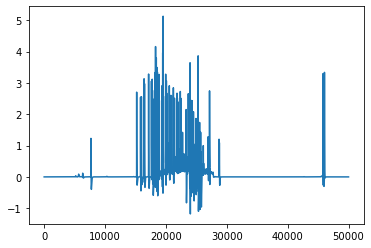

In [10]:
plt.plot(diff[:50000])

In [11]:
#np.save("/scratch/yjk27/CA1_NA_NMDA/data/V_diff_NA1.5_NMDA1.5_stimseed1.npy", diff)

In [6]:
raw_neural1 = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npz")
raw_neural2 = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural_set2.npz")
raw_neural3 = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural_set3.npz")

full_neural = vstack((raw_neural1, raw_neural2, raw_neural3))

In [7]:
window = 250
plot_no = 3000//window

fr_array = np.empty((plot_no, 2, 50000))

for i in tnrange(plot_no):
    part_neural1 = full_neural[i*window*50000:(i+1)*window*50000, 880:940]
    part_neural2 = full_neural[i*window*50000:(i+1)*window*50000, 940:1000]
    
    part_sum1 = scipy.sparse.csr_matrix.sum(part_neural1, 1).reshape(window,50000)
    part_sum2 = scipy.sparse.csr_matrix.sum(part_neural2, 1).reshape(window,50000)
    
    fr1 = np.sum(np.asarray(part_sum1), 0).flatten()
    fr2 = np.sum(np.asarray(part_sum2), 0).flatten()
    
    fr_array[i,0] = fr1
    fr_array[i,1] = fr2

print(np.sum(fr_array[:,0,:]))

/tmp/ipykernel_4977/2363508551.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(plot_no):


  0%|          | 0/12 [00:00<?, ?it/s]

1064736.0


348.064
348.636
349.304
348.524
349.732
348.716
350.612
345.672
367.428
367.368
367.492
367.396


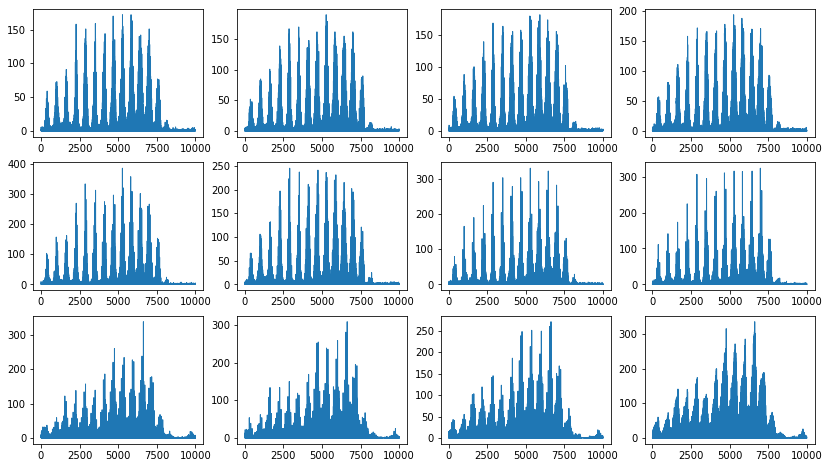

In [8]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14,8))

for row in range(3):
    for col in range(4):
        idx = row*4 + col
        axs[row,col].plot(fr_array[idx,0][16000:26000], linewidth=1)
        #axs[row,col].plot(fr_array[idx,1][16000:26000], linewidth=1)
        print(np.sum(fr_array[idx,0][:]) / window)

In [14]:
raw_neural1 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").astype(int)
raw_neural2 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set2.npy").astype(int)
raw_neural3 = np.load("/media/hdd01/sklee/CA1_clust4-60/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set3.npy").astype(int)
print(raw_neural1.shape)

raw_neural1 = raw_neural1[raw_neural1[:,2] < 10000]
raw_neural2 = raw_neural2[raw_neural2[:,2] < 10000]
raw_neural3 = raw_neural3[raw_neural3[:,2] < 10000]

raw_neural1 = raw_neural1[raw_neural1[:,0] > 0]
raw_neural2 = raw_neural2[raw_neural2[:,0] > 0]
raw_neural3 = raw_neural3[raw_neural3[:,0] > 0]
print(raw_neural1.shape)

raw_neural1 = raw_neural1[(raw_neural1[:,1] >= 880) & (raw_neural1[:,1] <= 940)]
raw_neural2 = raw_neural2[(raw_neural2[:,1] >= 880) & (raw_neural2[:,1] <= 940)]
raw_neural3 = raw_neural3[(raw_neural3[:,1] >= 880) & (raw_neural3[:,1] <= 940)]
print(raw_neural1.shape[0] / 1000)
print(raw_neural2.shape[0] / 1000)
print(raw_neural3.shape[0] / 1000)

raw_neural2[:,0] += 1000
raw_neural3[:,0] += 2000

full_neural = np.vstack((raw_neural1, raw_neural2, raw_neural3))

(25490086, 3)
(11411785, 3)
357.269
357.489
356.701


In [15]:
window = 250
plot_no = 3000//window

fr_array = np.zeros((plot_no, 50000))

for i in tnrange(plot_no):
    part_neural = full_neural[(full_neural[:,0] >= i*window) & (full_neural[:,0] < (i+1)*window)]
    part_idx = np.unique(part_neural[:,2])
    for j in range(part_idx.shape[0]):
        t = part_idx[j]
        count = np.where(part_neural[:,2] == t)[0].size
        fr_array[i,t*5] += count

/tmp/ipykernel_3916/2299307588.py:6: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(plot_no):


  0%|          | 0/12 [00:00<?, ?it/s]

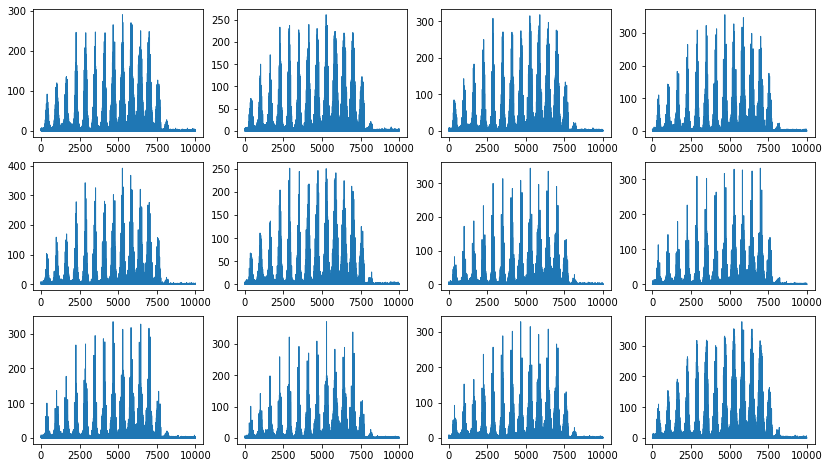

In [17]:
fig, axs = plt.subplots(nrows=3, ncols=4, figsize=(14,8))

for row in range(3):
    for col in range(4):
        idx = row*4 + col
        axs[row,col].plot(fr_array[idx][16000:26000], linewidth=1)
        #axs[row,col].plot(fr_array[idx,1][16000:26000], linewidth=1)
        #print(np.sum(fr_array[idx,0][:]) / window)

In [2]:
raw_train = np.load("/media/hdd01/sklee/CA1_clust4-60/data/stim_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy").astype(int)
raw_train = raw_train[raw_train[:,2] <= 10000]

#######
rep = 1000
#raw_train = raw_train[np.abs(raw_train[:,0]) <= 20]
#######

pick_idx = np.arange(1,(rep-1)*2,2)
start_idx = np.zeros((rep+1))
raw_start_idx = np.where(np.diff(raw_train[:,2]) <= -9000)[0][pick_idx] + 1
start_idx[1:-1] = raw_start_idx
start_idx[-1] = raw_train.shape[0]
start_idx = start_idx.astype(int)
for i in tnrange(rep):
    raw_train[start_idx[i]:start_idx[i+1],2] += i*10000

raw_train = np.delete(raw_train, np.where(np.isnan(raw_train) == True)[0], 0)
E_train = raw_train[np.where(raw_train[:,0]>0)]
I_train = raw_train[np.where(raw_train[:,0]<0)]
print(E_train.shape[0] + I_train.shape[0])

#raw_train[:,2] -= 1

/tmp/ipykernel_4567/1917201026.py:15: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep):


  0%|          | 0/1000 [00:00<?, ?it/s]

25484127


In [3]:
E_neural_list = []
I_neural_list = []
bin_size = 1/5
bin_no = 50000

E_count_total = 0
I_count_total = 0
E_no = 2000
I_no = 200

for i in tnrange(rep):
    E_neural = np.zeros((bin_no, E_no))
    I_neural = np.zeros((bin_no, I_no))
    
    bin_edges = np.arange(int(i*bin_size*bin_no), int((i+1)*bin_size*bin_no), bin_size)
    bin_edges = np.round(bin_edges, 1)
    if i == rep-1:
        bin_edges = np.append(bin_edges, np.asarray([int((i+1)*bin_size*bin_no)]), 0)
    else:
        bin_edges = np.append(bin_edges, np.asarray([int((i+1)*bin_size*bin_no)-0.000001]), 0)
    
    #if bin_edges.shape[0] > 50001:
        #bin_edges = np.delete(bin_edges, -1, 0)
    #elif bin_edges.shape[0] < 50001:
        #bin_edges = np.append(bin_edges, bin_edges[-1] + 0.2, 0)
    
    E_train_part = E_train[(E_train[:,2] >= i*10000+1) & (E_train[:,2] < (i+1)*10000+1)]
    I_train_part = I_train[(I_train[:,2] >= i*10000+1) & (I_train[:,2] < (i+1)*10000+1)]
    
    E_counts, E_edges = np.histogram(E_train_part[:,2], bin_edges)
    I_counts, I_edges = np.histogram(I_train_part[:,2], bin_edges)

    E_count = 0
    I_count = 0
    
    for j in range(E_counts.shape[0]):
        bin_count = E_counts[j]
        for k in range(bin_count):
            syn = int(E_train_part[E_count,1])
            E_neural[j,syn] += 1
            E_count += 1
            
    for j in range(I_counts.shape[0]):
        bin_count = I_counts[j]
        for k in range(bin_count):
            syn = int(I_train_part[I_count,1])
            I_neural[j,syn] += 1
            I_count += 1
    
    E_count_total += E_count
    I_count_total += I_count
    
    E_neural = csr_matrix(E_neural)
    I_neural = csr_matrix(I_neural)
    E_neural_list.append(E_neural)
    I_neural_list.append(I_neural)
    
print(E_train.shape[0])
print(E_count_total)
print(I_train.shape[0])
print(I_count_total)

/tmp/ipykernel_4567/2688361192.py:11: TqdmDeprecationWarning: Please use `tqdm.notebook.trange` instead of `tqdm.tnrange`
  for i in tnrange(rep):


  0%|          | 0/1000 [00:00<?, ?it/s]

11413269
11411537
14070858
14069358


In [5]:
E_neural_all = scipy.sparse.vstack(E_neural_list)
I_neural_all = scipy.sparse.vstack(I_neural_list)

In [10]:
new = E_neural_all[50000:450000].toarray()
old = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npz")[50000:450000].toarray()

In [11]:
print(np.sum(np.abs(new-old)))

15907.0


In [6]:
#scipy.sparse.save_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural_set2.npz", E_neural_all)
#scipy.sparse.save_npz("/media/hdd01/sklee/CA1_clust4-60/data/Ispikes_neural_set2.npz", I_neural_all)

In [ ]:
new = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural_NEW.npz")
old = scipy.sparse.load_npz("/media/hdd01/sklee/CA1_clust4-60/data/Espikes_neural.npz")

In [ ]:
diff_array = np.empty((300))

for i in tnrange(300):
    new_part = new[i*50000:(i+1)*50000].toarray()
    old_part = old[i*50000:(i+1)*50000].toarray()
    diff_array[i] = np.sum(np.abs(new_part - old_part))

In [2]:
eloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Elocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[:,0]
iloc = np.load("/media/hdd01/sklee/CA1_clust4-60/data/Ilocs_T10_Ne2000_gA0.6_tauA1_gN0.8_Ni200_gG0.1_gB0.1_Er0.5_Ir7.4_random_NR_rep1000_stimseed1_set1.npy")[:,0]

In [3]:
C_syn_e = np.zeros((4*2+1, 2000))
C_syn_i = np.zeros((4*2+1, 200))

for e in range(2000):
    if eloc[e] == 8:
        C_syn_e[0,e] = 1
    elif int(eloc[e]) in [2,3,7]:
        C_syn_e[1,e] = 1
    elif eloc[e] == 13:
        C_syn_e[2,e] = 1
    elif int(eloc[e]) in [2,10,11]:
        C_syn_e[3,e] = 1
    elif eloc[e] == 36:
        C_syn_e[4,e] = 1
    elif int(eloc[e]) in [15,17,35]:
        C_syn_e[5,e] = 1
    elif eloc[e] == 59:
        C_syn_e[6,e] = 1
    elif int(eloc[e]) in [46,54,58]:
        C_syn_e[7,e] = 1
    
    """
    elif eloc[e] == 21:
        C_syn_e[8,e] = 1
    elif eloc[e] in np.asarray([15,17,18,19]):
        C_syn_e[9,e] = 1
    elif eloc[e] == 40:
        C_syn_e[10,e] = 1
    elif eloc[e] in np.asarray([15,17,35,39]):
        C_syn_e[11,e] = 1
    elif eloc[e] == 9:
        C_syn_e[12,e] = 1
    elif eloc[e] in np.asarray([2,3,7]):
        C_syn_e[13,e] = 1
    elif eloc[e] == 134:
        C_syn_e[14,e] = 1
    elif eloc[e] in np.delete(np.arange(74,134), [8,24]):
        C_syn_e[15,e] = 1
      
    elif eloc[e] == 64:
        C_syn_e[16,e] = 1
    elif eloc[e] in np.asarray([61,63]):
        C_syn_e[17,e] = 1
    elif eloc[e] == 143:
        C_syn_e[18,e] = 1
    elif eloc[e] in np.delete(np.arange(74,143), [8,24,60]):
        C_syn_e[19,e] = 1
    elif eloc[e] == 82:
        C_syn_e[20,e] = 1
    elif eloc[e] in np.asarray([74,76,80,81]):
        C_syn_e[21,e] = 1
    elif eloc[e] == 98:
        C_syn_e[22,e] = 1
    elif eloc[e] in np.delete(np.arange(74,98), [8]):
        C_syn_e[23,e] = 1
    """
    
for e in range(200):
    if iloc[e] == 8:
        C_syn_i[0,e] = 1
    elif int(iloc[e]) in [2,3,7]:
        C_syn_i[1,e] = 1
    elif iloc[e] == 13:
        C_syn_i[2,e] = 1
    elif int(iloc[e]) in [2,10,11]:
        C_syn_i[3,e] = 1
    elif iloc[e] == 36:
        C_syn_i[4,e] = 1
    elif int(iloc[e]) in [15,17,35]:
        C_syn_i[5,e] = 1
    elif iloc[e] == 59:
        C_syn_i[6,e] = 1
    elif int(iloc[e]) in [46,54,58]:
        C_syn_i[7,e] = 1
    
    """
    elif iloc[e] == 21:
        C_syn_i[8,e] = 1
    elif iloc[e] in np.asarray([15,17,18,19]):
        C_syn_i[9,e] = 1
    elif iloc[e] == 40:
        C_syn_i[10,e] = 1
    elif iloc[e] in np.asarray([15,17,35,39]):
        C_syn_i[11,e] = 1
    elif iloc[e] == 9:
        C_syn_i[12,e] = 1
    elif iloc[e] in np.asarray([2,3,7]):
        C_syn_i[13,e] = 1
    elif iloc[e] == 134:
        C_syn_i[14,e] = 1
    elif iloc[e] in np.delete(np.arange(74,134), [8,24]):
        C_syn_i[15,e] = 1
      
    elif iloc[e] == 64:
        C_syn_i[16,e] = 1
    elif iloc[e] in np.asarray([61,63]):
        C_syn_i[17,e] = 1
    elif iloc[e] == 143:
        C_syn_i[18,e] = 1
    elif iloc[e] in np.delete(np.arange(74,143), [8,24,60]):
        C_syn_i[19,e] = 1
    elif iloc[e] == 82:
        C_syn_i[20,e] = 1
    elif iloc[e] in np.asarray([74,76,80,81]):
        C_syn_i[21,e] = 1
    elif iloc[e] == 98:
        C_syn_i[22,e] = 1
    elif iloc[e] in np.delete(np.arange(74,98), [8]):
        C_syn_i[23,e] = 1
    """
    
empty_e_idx = np.where(np.sum(C_syn_e, 0) == 0)[0]
empty_i_idx = np.where(np.sum(C_syn_i, 0) == 0)[0]
C_syn_e[-1,empty_e_idx] = 1
C_syn_i[-1,empty_i_idx] = 1

In [4]:
print(np.sum(C_syn_e))

2000.0


In [6]:
#np.save("/media/hdd01/sklee/CA1_clust4-60_noNA/data/handsub4+4_C_syn_e.npy", C_syn_e)
#np.save("/media/hdd01/sklee/CA1_clust4-60_noNA/data/handsub4+4_C_syn_i.npy", C_syn_i)